
1.	Train a fully connected neural network (multilayer perceptron) to classify handwritten digits using the MNIST dataset by building a simple neural network, experimenting with activation functions, and tuning hyperparameters.



In [1]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

In [2]:
# 1. Data Preparation

print("--- 1. Loading and Preparing Data ---")

--- 1. Loading and Preparing Data ---


In [3]:
# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [4]:
# Normalize images: scale pixel values from 0-255 to 0-1
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [5]:
# Determine the number of classes (10, for digits 0-9)
num_classes = 10

In [6]:
# Convert labels to one-hot encoding (required for categorical_crossentropy)
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [7]:
# Define the input shape for the Flatten layer (28x28 image)
# This results in 784 features per sample
input_shape = x_train.shape[1:]

print(f"Training data shape: {x_train.shape}")
print(f"Test data shape: {x_test.shape}")
print(f"Input feature vector size: {input_shape[0] * input_shape[1]}")

Training data shape: (60000, 28, 28)
Test data shape: (10000, 28, 28)
Input feature vector size: 784


In [8]:
# --- 2. Building the MLP Model ---

print("\n--- 2. Building the Fully Connected Network (MLP) ---")

model = Sequential([
    # Flatten layer: Converts the 28x28 image into a 784-element vector
    Flatten(input_shape=input_shape, name='Input_Flatten'),

    # Hidden Layer 1: 128 neurons with ReLU activation
    Dense(128, activation='relu', name='Hidden_Layer_1'),

    # Hidden Layer 2: 64 neurons with ReLU activation
    Dense(64, activation='relu', name='Hidden_Layer_2'),

    # Output Layer: 10 neurons (for 10 classes) with Softmax activation
    # Softmax ensures the output is a probability distribution
    Dense(num_classes, activation='softmax', name='Output_Layer')
])

model.summary()


--- 2. Building the Fully Connected Network (MLP) ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Input_Flatten (Flatten)         │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_1 (Dense)          │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Hidden_Layer_2 (Dense)          │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output_Layer (Dense)            │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
# --- 3. Compile the Model (Hyperparameters) ---

# Hyperparameter Tuning: Using Adam optimizer with a standard learning rate
optimizer = Adam(learning_rate=0.001)

model.compile(
    optimizer=optimizer,
    # Loss function for multi-class classification with one-hot labels
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
# --- 4. Train the Model ---

# Hyperparameter Tuning:
# epochs=10: The model sees the entire training set 10 times.
# batch_size=128: 128 samples are processed before weights are updated.
print("\n--- 4. Training the Model (Epochs=10, Batch Size=128) ---")
history = model.fit(
    x_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)


--- 4. Training the Model (Epochs=10, Batch Size=128) ---
Epoch 1/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 4s 6ms/step - accuracy: 0.8177 - loss: 0.6356 - val_accuracy: 0.9573 - val_loss: 0.1508
Epoch 2/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9522 - loss: 0.1591 - val_accuracy: 0.9683 - val_loss: 0.1131
Epoch 3/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9684 - loss: 0.1075 - val_accuracy: 0.9765 - val_loss: 0.0855
Epoch 4/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9783 - loss: 0.0764 - val_accuracy: 0.9773 - val_loss: 0.0775
Epoch 5/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9833 - loss: 0.0584 - val_accuracy: 0.9780 - val_loss: 0.0802
Epoch 6/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.9869 - loss: 0.0455 - val_accuracy: 0.9818 - val_loss: 0.0710
Epoch 7/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9897 - loss: 0.0361 - val_accuracy: 0.9787 - val_loss: 0.0725
Epoch 8/10
422/422 ━━━━━━━━━━━━━━━━━━━━ 3s 7m

In [9]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.optimizers import Adam
import numpy as np

In [14]:
# --- 1. Data Preparation ---

print("--- 1. Loading and Preparing CIFAR-10 Data ---")

# Load CIFAR-10 data (50,000 training, 10,000 testing images of size 32x32x3)
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# 1.1. Data Normalization: Convert pixel values from 0-255 to 0-1
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# 1.2. One-Hot Encoding: Convert labels to categorical format
num_classes = 10
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# 1.3. Define Input Shape
input_shape = x_train.shape[1:]  # (32, 32, 3) for the 32x32 RGB images

print(f"Training data shape: {x_train.shape}")
print(f"Input image shape: {input_shape}")


--- 1. Loading and Preparing CIFAR-10 Data ---
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Training data shape: (50000, 32, 32, 3)
Input image shape: (32, 32, 3)


In [15]:
# --- 2. Building the CNN Architecture ---
# This design uses two main Conv-Block structures: (Conv -> BatchNorm -> Conv -> MaxPool -> Dropout)
# BatchNormalization stabilizes training, and Dropout prevents overfitting.

print("\n--- 2. Building the CNN Model with Pooling, BatchNorm, and Dropout ---")

model = Sequential([
    # --- Convolutional Block 1 ---
    # 2.1. Conv2D: 32 filters, 3x3 kernel, ReLU activation
    Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape, name='Conv_1'),
    # 2.2. BatchNormalization: Speeds up training and provides regularization.
    BatchNormalization(name='BatchNorm_1'),

    # 2.3. Conv2D: Second layer in the block.
    Conv2D(32, (3, 3), activation='relu', name='Conv_2'),
    # 2.4. MaxPooling2D: Reduces spatial dimensions (32x32 -> 16x16).
    MaxPooling2D(pool_size=(2, 2), name='MaxPool_1'),
    # 2.5. Dropout: Drops 25% of connections.
    Dropout(0.25, name='Dropout_1'),

    #

    # --- Convolutional Block 2 (Increased complexity) ---
    Conv2D(64, (3, 3), padding='same', activation='relu', name='Conv_3'),
    BatchNormalization(name='BatchNorm_2'),

    Conv2D(64, (3, 3), activation='relu', name='Conv_4'),
    MaxPooling2D(pool_size=(2, 2), name='MaxPool_2'), # Downsamples further (16x16 -> 8x8).
    Dropout(0.25, name='Dropout_2'),

    # --- Fully Connected (Dense) Head ---
    # 2.6. Flatten: Prepares the 3D feature maps (8x8x64) for the fully connected layer.
    Flatten(name='Flatten'),

    # 2.7. Dense Layer: High-level feature combination.
    Dense(512, activation='relu', name='Dense_1'),
    # 2.8. Dropout: Heavier dropout (50%) for the large dense layer.
    Dropout(0.5, name='Dropout_3'),

    # 2.9. Output Layer: 10 neurons, Softmax activation.
    Dense(num_classes, activation='softmax', name='Output')
])

model.summary()



--- 2. Building the CNN Model with Pooling, BatchNorm, and Dropout ---


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ Conv_1 (Conv2D)                 │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_1                     │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_2 (Conv2D)                 │ (None, 30, 30, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_1 (MaxPooling2D)        │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_1 (Dropout)             │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_3 (Conv2D)                 │ (None, 15, 15, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ BatchNorm_2                     │ (None, 15, 15, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Conv_4 (Conv2D)                 │ (None, 13, 13, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ MaxPool_2 (MaxPooling2D)        │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_2 (Dropout)             │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 2304)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dense_1 (Dense)                 │ (None, 512)            │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Dropout_3 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Output (Dense)                  │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,251,242 (4.77 MB)

 Trainable params: 1,251,050 (4.77 MB)

 Non-trainable params: 192 (768.00 B)

In [16]:
# --- 3. Compile the Model ---

print("\n--- 3. Compiling the Model ---")
# Use the Adam optimizer and categorical cross-entropy loss
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


--- 3. Compiling the Model ---


In [19]:
# Training for 20 epochs with a batch size of 64
print("\n--- 4. Training the Model (Epochs=20, Batch Size=64) ---")
history = model.fit(
    x_train,
    y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.1, # Use 10% of training data for validation
    verbose=1
)


--- 4. Training the Model (Epochs=20, Batch Size=64) ---
Epoch 1/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 233s 326ms/step - accuracy: 0.3204 - loss: 2.0281 - val_accuracy: 0.5044 - val_loss: 1.4019
Epoch 2/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 265s 331ms/step - accuracy: 0.5430 - loss: 1.2720 - val_accuracy: 0.6286 - val_loss: 1.0628
Epoch 3/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 230s 327ms/step - accuracy: 0.6263 - loss: 1.0610 - val_accuracy: 0.6650 - val_loss: 0.9868
Epoch 4/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 259s 323ms/step - accuracy: 0.6736 - loss: 0.9461 - val_accuracy: 0.7012 - val_loss: 0.8702
Epoch 5/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 268s 332ms/step - accuracy: 0.7020 - loss: 0.8528 - val_accuracy: 0.7218 - val_loss: 0.7907
Epoch 6/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 233s 330ms/step - accuracy: 0.7223 - loss: 0.7972 - val_accuracy: 0.7460 - val_loss: 0.7491
Epoch 7/20
704/704 ━━━━━━━━━━━━━━━━━━━━ 264s 333ms/step - accuracy: 0.7361 - loss: 0.7478 - val_accuracy: 0.7394 - val_loss: 0.7441
Epoch 8/20
704/704

2.	Build a CNN from scratch to classify images in the CIFAR-10 dataset. Focus on designing an effective CNN architecture and using pooling, dropout, and batch normalization.

In [12]:
import tensorflow as tf
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, GRU, Dense, Dropout
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.optimizers import Adam
import numpy as np

# --- 1. Hyperparameters and Data Loading ---

# Hyperparameters for the model and data
MAX_WORDS = 10000       # Only consider the top 10,000 most frequent words
MAX_LEN = 256           # Maximum sequence length for padding
EMBEDDING_DIM = 128     # Dimension of the word embedding vectors
BATCH_SIZE = 128
EPOCHS = 10

print("--- 1. Loading and Preprocessing IMDB Data ---")

# Load the IMDB dataset
# Note: Data is already tokenized and encoded as word indices
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=MAX_WORDS)

# 1.1. Sequence Padding
# Pad sequences to a uniform length (MAX_LEN). 'post' padding adds zeros at the end.
x_train = pad_sequences(x_train, maxlen=MAX_LEN, padding='post', truncating='post')
x_test = pad_sequences(x_test, maxlen=MAX_LEN, padding='post', truncating='post')

print(f"Original sequence length (before padding): Max: {max([len(x) for x in x_train[:1000]])}")
print(f"Padded sequence shape: {x_train.shape}")
print(f"Max sequence length used: {MAX_LEN}")

# --- 2. Build and Train LSTM Model ---

print("\n--- 2. Building and Training the LSTM Model ---")

lstm_model = Sequential([
    # 2.1. Embedding Layer: Converts word indices into dense vectors of EMBEDDING_DIM
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN, name='Embedding_LSTM'),

    # 2.2. LSTM Layer: The core RNN layer, processing sequences and capturing long-term dependencies
    LSTM(64, name='LSTM_Layer'),

    # 2.3. Dense Layers for classification
    Dense(64, activation='relu', name='Dense_1_LSTM'),
    Dropout(0.5, name='Dropout_1_LSTM'),

    # 2.4. Output Layer: Single neuron with sigmoid for binary classification (positive/negative)
    Dense(1, activation='sigmoid', name='Output_LSTM')
])

lstm_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n--- Training LSTM Model ---")
lstm_history = lstm_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0
)

# 2.5. Evaluate LSTM Model
lstm_loss, lstm_acc = lstm_model.evaluate(x_test, y_test, verbose=0)
print(f"LSTM Test Loss: {lstm_loss:.4f}")
print(f"LSTM Test Accuracy: {lstm_acc*100:.2f}%")


# --- 3. Build and Train GRU Model for Comparison ---

print("\n--- 3. Building and Training the GRU Model ---")

gru_model = Sequential([
    # 3.1. Embedding Layer (reusing parameters)
    Embedding(MAX_WORDS, EMBEDDING_DIM, input_length=MAX_LEN, name='Embedding_GRU'),

    # 3.2. GRU Layer: Simpler and often faster than LSTM, but still handles sequence data
    GRU(64, name='GRU_Layer'),

    # 3.3. Dense Layers for classification
    Dense(64, activation='relu', name='Dense_1_GRU'),
    Dropout(0.5, name='Dropout_1_GRU'),

    # 3.4. Output Layer
    Dense(1, activation='sigmoid', name='Output_GRU')
])

gru_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy']
)

print("\n--- Training GRU Model ---")
gru_history = gru_model.fit(
    x_train, y_train,
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    validation_split=0.1,
    verbose=0
)

# 3.5. Evaluate GRU Model
gru_loss, gru_acc = gru_model.evaluate(x_test, y_test, verbose=0)
print(f"GRU Test Loss: {gru_loss:.4f}")
print(f"GRU Test Accuracy: {gru_acc*100:.2f}%")

# --- 4. Comparison Summary ---
print("\n=============================================")
print("  LSTM vs GRU Sentiment Analysis Summary   ")
print("=============================================")
print(f"LSTM Final Accuracy: {lstm_acc*100:.2f}%")
print(f"GRU Final Accuracy:  {gru_acc*100:.2f}%")
print("---------------------------------------------")
if lstm_acc > gru_acc:
    print("LSTM performed slightly better in this run.")
elif gru_acc > lstm_acc:
    print("GRU performed slightly better in this run.")
else:
    print("Both models achieved similar accuracy.")
print("=============================================")

--- 1. Loading and Preprocessing IMDB Data ---
Original sequence length (before padding): Max: 256
Padded sequence shape: (25000, 256)
Max sequence length used: 256

--- 2. Building and Training the LSTM Model ---

--- Training LSTM Model ---
LSTM Test Loss: 0.5749
LSTM Test Accuracy: 82.97%

--- 3. Building and Training the GRU Model ---

--- Training GRU Model ---
GRU Test Loss: 0.7843
GRU Test Accuracy: 84.79%

  LSTM vs GRU Sentiment Analysis Summary   
LSTM Final Accuracy: 82.97%
GRU Final Accuracy:  84.79%
---------------------------------------------
GRU performed slightly better in this run.


3.	Use an LSTM-based RNN to perform sentiment analysis on movie reviews using the IMDB dataset. Handle sequence padding, embedding, and explore the effect of GRU vs LSTM.

In [13]:
from tensorflow.keras.datasets import imdb

max_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_words)

In [14]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 200
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [15]:
from tensorflow.keras.layers import Embedding

embedding_dim = 128

In [17]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

model = Sequential([
    Embedding(input_dim=max_words, output_dim=embedding_dim, input_length=max_len),
    LSTM(128),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam",
              loss="binary_crossentropy",
              metrics=["accuracy"])

model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [18]:
history = model.fit(x_train, y_train,
                    validation_split=0.2,
                    epochs=5,
                    batch_size=64)

Epoch 1/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 143s 445ms/step - accuracy: 0.7313 - loss: 0.5181 - val_accuracy: 0.8450 - val_loss: 0.3598
Epoch 2/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 141s 443ms/step - accuracy: 0.9028 - loss: 0.2485 - val_accuracy: 0.8700 - val_loss: 0.3258
Epoch 3/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 140s 446ms/step - accuracy: 0.9308 - loss: 0.1907 - val_accuracy: 0.8612 - val_loss: 0.3389
Epoch 4/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 153s 480ms/step - accuracy: 0.9455 - loss: 0.1480 - val_accuracy: 0.8554 - val_loss: 0.4145
Epoch 5/5
313/313 ━━━━━━━━━━━━━━━━━━━━ 150s 480ms/step - accuracy: 0.9640 - loss: 0.1002 - val_accuracy: 0.8616 - val_loss: 0.4088


In [19]:
model.evaluate(x_test, y_test)


782/782 ━━━━━━━━━━━━━━━━━━━━ 73s 93ms/step - accuracy: 0.8529 - loss: 0.4289


[0.4280548691749573, 0.854200005531311]

In [21]:
from tensorflow.keras.layers import GRU

model_gru = Sequential([
    Embedding(max_words, embedding_dim, input_length=max_len),
    GRU(128),
    Dense(1, activation="sigmoid")
])

model_gru.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

4.	Implement a simple Generative Adversarial Network (GAN) to generate synthetic images similar to
MNIST digits. Learn how to build Generator and Discriminator, and train them adversarially.


In [22]:
from tensorflow.keras.datasets import mnist
import numpy as np

(x_train, _), (_, _) = mnist.load_data()

# Normalize images to [-1, 1]
x_train = (x_train.astype('float32') - 127.5) / 127.5
x_train = x_train.reshape(-1, 28*28)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Reshape

def build_generator():
    model = Sequential([
        Dense(256, activation="relu", input_shape=(100,)),
        Dense(512, activation="relu"),
        Dense(1024, activation="relu"),
        Dense(28*28, activation="tanh"),   # Output: 784 values between -1 and 1
        Reshape((28, 28))
    ])
    return model

In [24]:
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LeakyReLU

def build_discriminator():
    model = Sequential([
        Flatten(input_shape=(28, 28)),
        Dense(512),
        LeakyReLU(alpha=0.2),
        Dense(256),
        LeakyReLU(alpha=0.2),
        Dense(1, activation="sigmoid")  # Output: probability (real or fake)
    ])
    return model

In [25]:
from tensorflow.keras.optimizers import Adam

discriminator = build_discriminator()
discriminator.compile(
    loss="binary_crossentropy",
    optimizer=Adam(0.0002, 0.5),
    metrics=["accuracy"]
)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.12/dist-packages/keras/src/layers/activations/leaky_relu.py:41: UserWarning: Argument `alpha` is deprecated. Use `negative_slope` instead.
  warnings.warn(


In [26]:
generator = build_generator()

discriminator.trainable = False

from tensorflow.keras import Model
from tensorflow.keras.layers import Input

z = Input(shape=(100,))
img = generator(z)
validity = discriminator(img)

gan = Model(z, validity)
gan.compile(loss="binary_crossentropy", optimizer=Adam(0.0002, 0.5))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 211ms/step


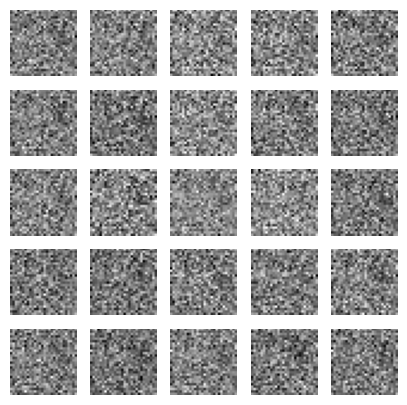

In [28]:
import matplotlib.pyplot as plt

noise = np.random.normal(0, 1, (25, 100))
gen_imgs = generator.predict(noise)

gen_imgs = 0.5 * gen_imgs + 0.5  # Scale 0-1

plt.figure(figsize=(5,5))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.imshow(gen_imgs[i], cmap="gray")
    plt.axis("off")
plt.show()

# New Section